<a href="https://colab.research.google.com/github/DevMachTech/notebooks/blob/master/SkinClassificationKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jun  1 09:30:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
%cd "drive/My Drive/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


In [ ]:
#!unzip -q "/content/drive/MyDrive/skindisease/all_train.zip"

In [ ]:
#%cd /content/drive/MyDrive/FaceRecognition/faces

In [ ]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [ ]:
# Creating the Pathlib PATH objects
train_path = Path("skindisease/all_train")
test_path = Path("skindisease/test")

In [ ]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['skindisease/all_train/acne/1.jpg',
 'skindisease/all_train/acne/10.jpg',
 'skindisease/all_train/acne/11.jpg',
 'skindisease/all_train/acne/12.jpg',
 'skindisease/all_train/acne/13.jpg',
 'skindisease/all_train/acne/14.jpg',
 'skindisease/all_train/acne/15.jpg',
 'skindisease/all_train/acne/16.jpg',
 'skindisease/all_train/acne/17.jpg',
 'skindisease/all_train/acne/18.jpg']

In [ ]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['acne',
 'acne',
 'acne',
 'acne',
 'acne',
 'acne',
 'acne',
 'acne',
 'acne',
 'acne']

In [ ]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))

test_image_paths[:10]

['skindisease/test/acne/10.jpg',
 'skindisease/test/acne/4.jpg',
 'skindisease/test/acne/6.jpg',
 'skindisease/test/acne/9.jpg',
 'skindisease/test/actinic/23.jpg',
 'skindisease/test/actinic/25.jpg',
 'skindisease/test/actinic/26.jpg',
 'skindisease/test/actinic/27.jpg',
 'skindisease/test/actinic/36.jpg',
 'skindisease/test/atopic/41.jpg']

In [ ]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

test_image_labels = list(map(lambda x : get_label(x) , test_image_paths))
test_image_labels[:10]

['acne',
 'acne',
 'acne',
 'acne',
 'actinic',
 'actinic',
 'actinic',
 'actinic',
 'actinic',
 'atopic']

In [ ]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
test_image_labels = Le.fit_transform(test_image_labels)

test_image_labels[:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2])

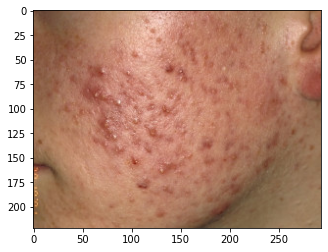

In [ ]:
from PIL import Image
img = Image.open(train_image_paths[1])
img = np.array(img)
plt.imshow(img)

In [ ]:
# used to change filepaths
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

# import Image from PIL
from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC
import cv2

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

Color bombus image has shape:  (222, 294, 3)
Greyscale bombus image has shape:  (256, 256)


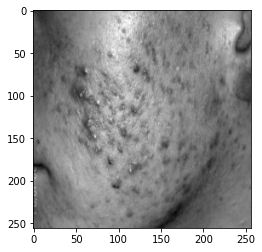

In [ ]:


# print the shape of the bombus image
print('Color bombus image has shape: ', img.shape)

# convert the bombus image to greyscale
#grey_bombus = rgb2grey(bombus)

from skimage.util import crop
#grey_img = crop(img, ((100, 200), (50, 50), (0,0)), copy=False)

from skimage.transform import resize
grey_img = resize(img, (256, 256), mode='reflect', anti_aliasing=True)
grey_img.shape

# convert the bombus image to greyscale
from skimage.color import rgb2grey
grey_img = rgb2grey(grey_img)

# show the greyscale image
plt.imshow(grey_img, cmap=mpl.cm.gray)

# greyscale bombus image only has one channel
print('Greyscale bombus image has shape: ', grey_img.shape)

HOG feature vector:  [0.43337906 0.04927064 0.05372971 ... 0.35355339 0.35355339 0.35355339]


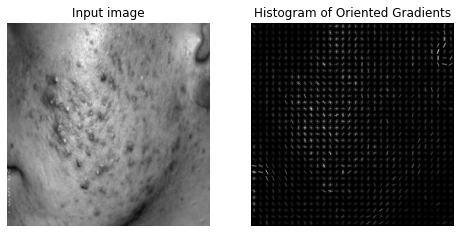

In [ ]:
hog_features, hog_image = hog(grey_img, orientations=8, pixels_per_cell=(8, 8),block_norm='L2-Hys',
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
print("HOG feature vector: ", hog_features)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(grey_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 20))

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
hog_features.shape

(8192,)

In [ ]:
all_images = []
flat_feature = []
for i in range(len(train_image_paths)):
    image = cv2.imread(train_image_paths[i])
        # flatten three channel color image
    color_features = image.flatten()
    # convert image to greyscale
    from skimage.util import crop
    #t_image = crop(image, ((100, 200), (50, 50), (0,0)), copy=False)

    from skimage.transform import resize
    t_image = resize(image, (256, 256), mode='reflect', anti_aliasing=True)
    #grey_bombus.shape
    grey_image = rgb2grey(t_image)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(8, 8))
    # combine color and hog features into a single array
    flat_features = np.hstack([color_features, hog_features])
    flat_feature.append(flat_features)
    #hog = HOG(image)  ### vector
    
    all_images.append(hog_features)   ## all subjects    20 x size of hog (100)

In [ ]:
all_images

[array([0.05888882, 0.16575995, 0.2332038 , ..., 0.03054115, 0.05601105,
        0.04862683]),
 array([0.09200714, 0.03422943, 0.        , ..., 0.0634761 , 0.08988208,
        0.0760744 ]),
 array([0.15208957, 0.00992364, 0.        , ..., 0.00092631, 0.0020475 ,
        0.0062675 ]),
 array([0.        , 0.        , 0.        , ..., 0.01757639, 0.04099174,
        0.05547025]),
 array([0.12568048, 0.05708222, 0.06007169, ..., 0.02774452, 0.04949807,
        0.07155517]),
 array([0.12633777, 0.03459533, 0.04881569, ..., 0.        , 0.03334912,
        0.14242316]),
 array([0.11300356, 0.00617445, 0.        , ..., 0.03811978, 0.01851909,
        0.04612035]),
 array([0.15084161, 0.10853941, 0.01155237, ..., 0.09863693, 0.06145414,
        0.04435476]),
 array([0.143097  , 0.07460739, 0.05524176, ..., 0.00222479, 0.00408547,
        0.00740491]),
 array([0.16812157, 0.07124868, 0.05569272, ..., 0.00703766, 0.01628466,
        0.05384302]),
 array([0.08992012, 0.06378538, 0.04925397, ..., 0

In [ ]:
all_images= np.array(all_images)
all_images.shape

(118, 72900)

In [ ]:
# get shape of feature matrix
print('Feature matrix shape is: ', all_images.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
skin_stand = ss.fit_transform(all_images)

pca = PCA(n_components=118)
# use fit_transform to run PCA on our standardized matrix
skin_pca = pca.fit_transform(skin_stand)
# look at new shape
print('PCA matrix shape is: ', skin_pca.shape)

Feature matrix shape is:  (118, 72900)
PCA matrix shape is:  (118, 118)


In [ ]:
X =  skin_pca
y = train_image_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234123)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

2    15
0    15
5    14
3    14
1    13
4    12
6    11
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

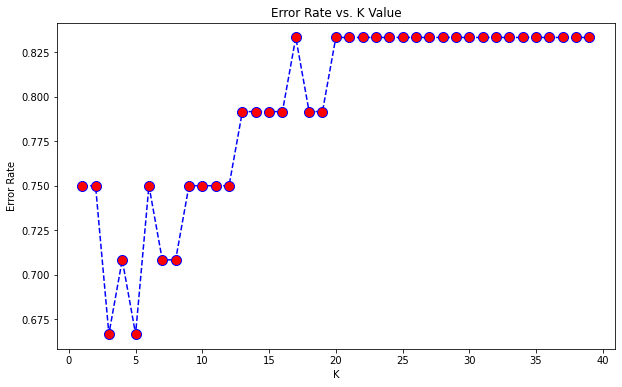

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[3 0 0 0 0 2 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 2 0]
 [1 0 0 0 0 1 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 2 1]]


              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.21      1.00      0.35         4
           6       1.00      0.33      0.50         3

    accuracy                           0.33        24
   macro avg       0.28      0.28      0.22        24
weighted avg       0.32      0.33      0.26        24



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
